# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo II - Tratamento e limpeza de Dados</span>


### <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics

# carregando dados
data_orig = pd.read_csv("./dados/pib_mba_avaliacao.csv")
data_orig

,Unnamed: 0,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,classe,desemprego
0,0,215,BAHIA,Tremedal,2010,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,1,9.3
1,1,306,RIO GRANDE DO SUL,Turuçu,2010,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,2,4.9
2,2,900,ESPIRITO SANTO,Vitória,2010,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,4,8.3
3,3,3613,MINAS GERAIS,Jacutinga,2010,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,2,NaN
4,4,1028,PIAUÍ,Nazária,2010,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,1,6.8
...,...,...,...,...,...,...,...,...,...,...,...
5566,5566,672,RIO GRANDE DO SUL,Machadinho,2010,5.715017e+04,5623,10163.639648,Produto Interno Bruto per capita,2,4.2
5567,5567,2102,PARÁ,Santa Maria do Pará,2010,9.988815e+04,23202,4305.149902,Produto Interno Bruto per capita,1,6.1
5568,5568,4655,SÃO PAULO,Mineiros do Tietê,2010,9.854938e+04,12334,7990.060059,Produto Interno Bruto per capita,1,8.1
5569,5569,1115,GOIÁS,Pirenópolis,2010,1.820774e+05,20945,8693.120117,Produto Interno Bruto per capita,1,4.2


Vamos utilizar uma base de dados baixada do IBGE com o PIB per capita para cada município brasileiro, essa base foi modificada para o propósito dos exercícios abaixo. Essa base possui as seguintes colunas:
* gid - identificador geográfico do município
* UF - unidade federativa
* nome - nome do município
* Censo - ano do censo relativo aos dados
* PIB - total do PIB
* Pop_est_2009 - populacao estimada	
* PIB_percapita - PIB per capita segundo os dados
* Descrição - Descrição do dados
* classe - classe do município
* desemprego - índice de desemprego na cidade no ano do Censo

**Antes de iniciar**:

1. Inspecione o tipo dos atributos e seus valores possíveis
    1. Verifique se há variáveis irrelevantes para a base de dados, ou que atrapalhem a análise. Identifique-as e remova-as.
    2. realize uma limpeza inicial considerando a:
        1. correção dos dados que forem possíveis inferir o valor verdadeiro, ajustando e padronizando-os. Anote quais variáveis isso ocorreu.
        2. conversão dos atributos que deveriam ser numéricos para numérico - inspecione os valores para garantir que a conversão não vá gerar dados faltantes de forma desnecessária, substituindo por numeros os que forem possíveis como por exemplo o atributo "floor" como visto na aula em que substituímos dados por 0. Anote as variáveis em que isso ocorreu.
        Verifique ainda se há padronizacao do tipo de dado (separador de decimal por ponto ou vírgula)
        
        OBS: utilize `df = df.drop('nome_Variavel', 1)` para remover uma variável de um dataframe `df`. Caso queira manter uma cópia por seguranca, utilize `df_copy = df.copy()` para realizar a cópia.
        
        *Importante*: nesse passo, ainda não remova outliers!


2. Procure por municípios duplicados, considerando nome e UF. Para isso use:
  `data.duplicated(variaveis)`
  

3. Remova as linhas duplicadas encontradas no passo anterior, tratando da melhor forma as duplicatas


In [2]:
data = data_orig.copy()

In [3]:
# inspecionando atributos nao numéricos
for var in data:
    print(var,"- tipo: ", data[var].dtype.name)
    print(data[var].unique())

Unnamed: 0 - tipo:  int64
[   0    1    2 ... 5568 5569 5570]
gid - tipo:  int64
[ 215  306  900 ... 3779  617  672]
UF - tipo:  object
['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'PIAU' 'PARANA ']
nome - tipo:  object
['Tremedal' 'Turuçu' 'Vitória' ... 'Guararapes' 'Barra do Guarita'
 'Machadinho']
Censo - tipo:  object
['2010' '“2010' nan '2007' '2030']
PIB - tipo:  float64
[   57883.9921875     45723.875      19782628.         ...
   532019.125         21980.63671875    57150.171875  ]
Pop_est_2009 - tipo:  int64
[ 18433   4000 320156 ...  13983  29639   5623]
PIB_percapita - tipo:  float64
[ 3140.23999023 11430.96972656 61790.58984375 ... 17949.97070312
  7166.81982422 10163.639648

In [4]:
# removendo a primeira coluna que é apenas um ID extra
data = data.drop('Unnamed: 0', axis = 1)
# removendo a coluna descricao, pois todos os valores são iguais
data = data.drop('Descrição', axis = 1)
data

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
0,215,BAHIA,Tremedal,2010,5.788399e+04,18433,3140.239990,1,9.3
1,306,RIO GRANDE DO SUL,Turuçu,2010,4.572388e+04,4000,11430.969727,2,4.9
2,900,ESPIRITO SANTO,Vitória,2010,1.978263e+07,320156,61790.589844,4,8.3
3,3613,MINAS GERAIS,Jacutinga,2010,2.478160e+05,21424,11567.209961,2,NaN
4,1028,PIAUÍ,Nazária,2010,2.095138e+04,7895,2653.750000,1,6.8
...,...,...,...,...,...,...,...,...,...
5566,672,RIO GRANDE DO SUL,Machadinho,2010,5.715017e+04,5623,10163.639648,2,4.2
5567,2102,PARÁ,Santa Maria do Pará,2010,9.988815e+04,23202,4305.149902,1,6.1
5568,4655,SÃO PAULO,Mineiros do Tietê,2010,9.854938e+04,12334,7990.060059,1,8.1
5569,1115,GOIÁS,Pirenópolis,2010,1.820774e+05,20945,8693.120117,1,4.2


In [5]:
# ajustando 'UF'
print(data['UF'].unique())

UFs_data = data['UF'].unique()

print(data['UF'].unique())

UFs_valid = np.array(['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS', 'PIAUÍ',
 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'SERGIPE', 'SÃO PAULO', 'PARAÍBA', 'TOCANTINS',
 'AMAZONAS', 'SANTA CATARINA', 'CEARÁ', 'RORAIMA', 'MARANHÃO', 'RIO DE JANEIRO',
 'MATO GROSSO', 'PARANÁ', 'ALAGOAS', 'MATO GROSSO DO SUL', 'ACRE',
 'RIO GRANDE DO NORTE', 'RONDÔNIA', 'AMAPÁ', 'DISTRITO FEDERAL'])

print(UFs_data[~np.isin(data['UF'].unique(), UFs_valid)])

data.loc[data['UF']=='PARANA', 'UF'] = 'PARANÁ'
data.loc[data['UF']=='PARANA ', 'UF'] = 'PARANÁ'
data.loc[data['UF']=='PIAU', 'UF'] = 'PIAUÍ'

UFs_data = data['UF'].unique()
print(UFs_data[~np.isin(data['UF'].unique(), UFs_valid)])

['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'PIAU' 'PARANA ']
['BAHIA' 'RIO GRANDE DO SUL' 'ESPIRITO SANTO' 'MINAS GERAIS' 'PIAUÍ'
 'GOIÁS' 'PERNAMBUCO' 'PARÁ' 'SERGIPE' 'SÃO PAULO' 'PARAÍBA' 'TOCANTINS'
 'AMAZONAS' 'SANTA CATARINA' 'CEARÁ' 'RORAIMA' 'MARANHÃO' 'RIO DE JANEIRO'
 'MATO GROSSO' 'PARANÁ' 'ALAGOAS' 'MATO GROSSO DO SUL' 'ACRE'
 'RIO GRANDE DO NORTE' 'RONDÔNIA' 'PARANA' 'AMAPÁ' 'DISTRITO FEDERAL'
 'PIAU' 'PARANA ']
['PARANA' 'PIAU' 'PARANA ']
[]


In [6]:
# ajustando 'Censo'
print(data['Censo'].unique())

data.loc[data['Censo']=='"2010', 'Censo'] = '2010'
data.loc[:,'Censo'] = pd.to_numeric(data.loc[:,'Censo'], downcast='integer', errors='coerce')

# ajustando 'Censo'
print(data['Censo'].unique())

['2010' '“2010' nan '2007' '2030']
[2010.   nan 2007. 2030.]


In [7]:
# ajustando desemprego
print(data['desemprego'].unique())

# selecionando todos os atributos não nulos
d_des = data.loc[data['desemprego'].notnull(), 'desemprego']

# usando expressao regular para detectar strings que não contém números válidos
non_num = d_des[~d_des.str.match('[+-]?([0-9]+([.][0-9]*)?|[.][0-9]+)')]
print(non_num)

# usando expressao regular para detectar strings que contém números separados por vírgula
num_comma = d_des[d_des.str.match('[-]?([0-9]*,[0-9]*)')]
print(num_comma)

data.loc[data['desemprego']=="6,4", 'desemprego'] = '6.4'

data.loc[data['desemprego']=="'7'", 'desemprego'] = '7'
data.loc[data['desemprego']=='x', 'desemprego'] = np.nan


['9.3' '4.9' '8.3' nan '6.8' '5.1' '4.8' '5.6' '3.9' '7.7' '6.9' '5.3'
 '5.9' '9.8' '6.6' '6' '9.7' '8.8' '7.9' '6.4' '4.7' '10.1' '5.5' '6.5'
 '7' '7.8' '9.5' '8.7' '6.7' '4.1' '5' '9.9' '8.1' '10.3' '8.2' '9.4'
 '5.2' '7.6' '8.6' '6.2' '7.2' '7.1' '9.1' '4.6' '5.4' '3.8' '5.8' '7.3'
 '3.3' '9' '5.7' '10.2' '8.4' '8.5' '8.9' '9.6' '7.4' '10.7' '3.6' '2.1'
 '4.3' '8' '6.1' '3.7' '10' '10.8' '4.2' '4.4' '6.3' '3.4' '9.2' '407'
 '3.5' '3' '4.5' '10.6' '7.5' '4' '13.7' '3.2' '12.6' '10.4' '11.8' '10.5'
 '2.3' '13.6' '2.7' '2.2' '2.5' '2.4' '2' '12.5' '14' '2.9' '1.9' '3.1'
 '2.6' '11.9' '12.9' '2.8' '12.1' '6,4' '12.2' 'x' "'7'"]
5509      x
5517    '7'
Name: desemprego, dtype: object
5430    6,4
Name: desemprego, dtype: object


In [8]:
# agora podemos fazer a conversao dos demais
data.loc[:,'desemprego'] = pd.to_numeric(data.loc[:,'desemprego'], errors='coerce')

# conferindo o tipo e imprimindo a estatística descritiva
print(data['desemprego'].dtype.name)
data['desemprego'].describe()

float64


count    5541.000000
mean        6.640624
std         5.679075
min         1.900000
25%         5.200000
50%         6.400000
75%         7.900000
max       407.000000
Name: desemprego, dtype: float64

In [9]:
# fazendo uma cópia da original
data_dup = data.copy()

data[data.duplicated(['nome', 'UF'], keep=False)]

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
2347,3474,PERNAMBUCO,Pedra,NaN,121027.789062,20788,5822.000000,1,8.5
2348,3474,PERNAMBUCO,Pedra,2010.0,121027.789062,20788,5822.000000,1,8.5
5461,3773,SÃO PAULO,Guapiara,2010.0,175721.890625,20927,8396.900391,1,7.2
5462,3773,SÃO PAULO,Guapiara,2010.0,175721.890625,20927,8396.900391,1,7.2
5519,1115,GOIÁS,Pirenópolis,2010.0,182077.437500,20945,8693.120117,1,4.2
5527,4655,SÃO PAULO,Mineiros do Tietê,2010.0,98549.375000,12334,7990.060059,1,8.1
5554,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,1,6.1
5567,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,1,6.1
5568,4655,SÃO PAULO,Mineiros do Tietê,2010.0,98549.375000,12334,7990.060059,1,8.1
5569,1115,GOIÁS,Pirenópolis,2010.0,182077.437500,20945,8693.120117,1,4.2


In [10]:
data[data.duplicated(keep=False)]

,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
5461,3773,SÃO PAULO,Guapiara,2010.0,175721.890625,20927,8396.900391,1,7.2
5462,3773,SÃO PAULO,Guapiara,2010.0,175721.890625,20927,8396.900391,1,7.2
5519,1115,GOIÁS,Pirenópolis,2010.0,182077.437500,20945,8693.120117,1,4.2
5527,4655,SÃO PAULO,Mineiros do Tietê,2010.0,98549.375000,12334,7990.060059,1,8.1
5554,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,1,6.1
5567,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,1,6.1
5568,4655,SÃO PAULO,Mineiros do Tietê,2010.0,98549.375000,12334,7990.060059,1,8.1
5569,1115,GOIÁS,Pirenópolis,2010.0,182077.437500,20945,8693.120117,1,4.2
5570,2102,PARÁ,Santa Maria do Pará,2010.0,99888.148438,23202,4305.149902,1,6.1


In [11]:
data = data.drop_duplicates(['nome', 'UF'], keep='last')

print("Total antes: %d, e depois de remover duplicatas: %d, removidas = %d" % (data_dup.shape[0], data.shape[0], data_dup.shape[0]-data.shape[0]))

Total antes: 5571, e depois de remover duplicatas: 5565, removidas = 6


### Exercício 1)
 
Considerando a limpeza inicial realizada, quais variáveis possuiam valores que precisaram ser padronizados ou corrigidos de forma a não causar perda de dados e/ou inconsistências
 
(a) UF, Desemprego, Censo, gid e nome<br>
<font color='red'>(b) UF, Desemprego, Censo<br></font>
(c) UF e gid<br>
(d) UF e Censo<br>

<font color='red'>Resposta</font>: *UF precisou ser padronizada pois haviam valores que significavam o mesma UF, mas estavam escritos de maneira diferente ou com erros de digitacao. Censo e Desemprego possuiam valores que eram passíveis de correcao.*

---

### Exercício 2)

Após verificar duplicatas, quantas linhas foram removidas?

(a) 5<br>
(b) 3<br>
(c) 4<br>
<font color='red'>(d) 6</font><br>

<font color='red'>Resposta</font>: *a cidade Pedra-PE não é completamente duplicada, uma delas tem um valor faltante, mas é possível remover essa linha e manter a que não tem valor faltante, resultando em 6.*


---

### Exercício 3)

Das 11 colunas iniciais, havia alguma identificada como irrelevante e que foi removida?

(a) não<br>
<font color='red'>(b) sim: as colunas 1 e 9 <br></font>
(b) sim: a coluna 9 <br>
(d) sim: a coluna 1, 2 e 9 <br>

<font color='red'>Resposta</font>: *a coluna 1 é apenas um ID sequencial, que pode dificultar a análise e não contribui para estudar os dados, a coluna 9 é a descricado dos dados e é igual para todas as linhas.*

---
### Exercício 4)

Vamos analisar possíveis outliers. Utilize o método da análise da dispersão pelo desvio padrão e inspecione as colunas 'gid', 'Censo', 'PIB', 'Pop_est_2009', 'desemprego', procurando por outliers globais com critério de 2 desvios padrões, i.e. $2\sigma$.

Quantos outliers foram encontrados, respectivamente, para 'gid', 'Censo', 'PIB', 'Pop_est_2009' e 'desemprego'?

(a) 0, 0, 1, 5, 27<br>
<font color='red'>(b) 0, 5, 9, 44, 1 <br></font>
(c) 0, 5, 5, 27, 1 <br>
(d) 0, 5, 5, 44, 2 <br>

In [12]:
def remove_outliers_std(df, attributes, t):
    
    dfn = df.copy()
    
    for var in attributes:
        # verifica se variável é numerica
        if np.issubdtype(df[var].dtype, np.number):
            crit_std = df[var].std() * t
            mu = df[var].mean()
            
            outl = dfn.loc[(df[var] < mu-crit_std) | (df[var] > mu+crit_std), :]
            tot_out = np.sum((df[var] < mu-crit_std) | (df[var] > mu+crit_std))
            
            # apenas inliers segundo std
            dfn = dfn.loc[(df[var] >= mu-crit_std) & (df[var] <= mu+crit_std),:]
            print('%s, mu = %.2f, std = %.2f, outliers = %d' % (var, mu, crit_std/t, tot_out))
            
    return dfn, outl

In [13]:
d, o = remove_outliers_std(data,['gid', 'Censo', 'PIB', 'Pop_est_2009', 'desemprego'], 2)

gid, mu = 2784.90, std = 1607.03, outliers = 0
Censo, mu = 2010.00, std = 0.28, outliers = 5
PIB, mu = 862048.17, std = 17673043.46, outliers = 9
Pop_est_2009, mu = 34408.02, std = 201803.45, outliers = 44
desemprego, mu = 6.64, std = 5.68, outliers = 1


### Exercício 5)

Analisando os outliers retornados em 'Censo' e 'desemprego' na questão anterior, quantos valores respectivamente, parecem ser outliers globais verdadeiros e para os quais se recomenda remover o valor antes de qualquer análise posterior?

(a) 5, 0<br>
(b) 0, 1<br>
(c) 5, 1<br>
<font color='red'>(d) 1,1 <br></font>


<font color='red'>Resposta:</font> *ver abaixo o código. Notar que em Censo o único valor realmente improvável é 2030. Já em desemprego, o valor encontrado está acima do padrão, visto que porcentagens vão até 100%.*

In [14]:
d, outc = remove_outliers_std(data,['Censo'], 1)
outc

Censo, mu = 2010.00, std = 0.28, outliers = 5


,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
855,3542,SÃO PAULO,PINHALZINHO,2007.0,1.122494e+05,12591,8915.049805,1,6.5
2999,5121,MATO GROSSO,Tangará da Serra,2030.0,1.315683e+06,81960,16052.750000,2,8.2
3560,1161,MATO GROSSO,Aripuanã,2007.0,3.420757e+05,20511,16677.669922,2,6.0
4878,1293,MATO GROSSO,Comodoro,2007.0,2.321221e+05,18974,12233.700195,2,6.4
5135,2026,MARANHÃO,Itaipava do Grajaú,2007.0,4.451448e+04,13964,3187.800049,1,7.1


In [15]:
d, outc = remove_outliers_std(data,['desemprego'], 2)
outc

desemprego, mu = 6.64, std = 5.68, outliers = 1


,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,classe,desemprego
376,1588,MARANHÃO,Carutapera,2010.0,67091.46875,21121,3176.530029,1,407.0


---

### Exercício 6)

Utilize a base de dados após a limpeza inicial (sem remover outliers). Imprima o total de valores faltantes em cada variável.

Quais variáveis possuem valores faltantes e em qual número?

<font color='red'>(a) nome:  2, Censo:  6, PIB:  1, PIB_percapita:  4, desemprego:  30</font><br>
(b) nome:  1, Censo:  6, PIB_percapita:  4, desemprego:  30<br>
(c) nome:  2, Censo:  7, PIB:  1, PIB_percapita:  4, desemprego:  30<br>
(d) nome:  2, Censo:  6, PIB_percapita:  4, desemprego:  30<br>

<font color='red'>Resposta</font>: *ver código abaixo*


In [16]:
# verificando atributos faltantes
for var in data:
    # imprime variavel
    missvar = np.sum(data[var].isnull())
    if (missvar > 0):
        print(var,"- faltantes: ", missvar)

nome - faltantes:  2
Censo - faltantes:  6
PIB - faltantes:  1
PIB_percapita - faltantes:  4
desemprego - faltantes:  30


In [17]:
def missing_condmean(df, att, att_cat):
        
    dfn = df.copy()
    print('- preencher ', att, ' condicionado a ', att_cat, end=' : ')
    nullatt = dfn[att].isnull()
    print(np.sum(nullatt), 'faltantes')

    for j in df[att_cat].unique():
        mu_cat = np.round(np.mean(df.loc[df[att_cat]==j, att]),1)
        
        if (df[att_cat].dtypes == np.int64):
            mu_cat = np.round(mu_cat,0)
            
        print('\t %s media = %.1f' % (j, mu_cat))
        dfn.loc[(df[att].isnull()) & (df[att_cat]==j), att] = mu_cat
        
    return dfn

---

### Exercício 7)

Codifique uma funcão que preencha valores faltantes de variáveis numéricas utilizando a média condicionada (ou agrupada) a uma outra variável C da base. Essa funcao deverá:
1. calcular a média da variável alvo A (a ser preenchida) relativa a (ou agrupada por) cada valor distinto da variável categórica selecionada C
2. atribuir a média calculada de forma agrupada a todas as linhas cuja variável alvo é faltante e que possua o valor da variável categórica correspondente
3. o valor atribuido deve seguir o mesmo tipo da variável alvo, ou seja, int, float, etc. Quando int, realize o arredondamento utlizando `np.round(,0)`, quando float64 utilize `np.round(,1)`

Use a funcão para preencher dados faltantes de desemprego condicionado a UF. Considerando arredondamento para 4 casas decimais, qual é a média da coluna desemprego para todas as linhas, antes e depois de realizar o preenchimento?

<font color='red'>(a) antes: 6.6406, depois: 6.6423</font><br>
(b) antes: 6.6406, depois:  6.6406<br>
(c) antes: 6.6423, depois:  6.6406<br>
(d) antes: 6.6423, depois:  6.6423<br>

*Resposta: ver código abaixo*

In [18]:
data_fill = missing_condmean(data, 'desemprego', 'UF')

print("Média antes : %.4f" % np.round(data.loc[:, 'desemprego'].mean(),4))
print("Média depois: %.4f"%  np.round(data_fill.loc[:, 'desemprego'].mean(),4))

- preencher  desemprego  condicionado a  UF : 30 faltantes
	 BAHIA media = 9.1
	 RIO GRANDE DO SUL media = 4.5
	 ESPIRITO SANTO media = 7.6
	 MINAS GERAIS media = 5.9
	 PIAUÍ media = 5.8
	 GOIÁS media = 4.7
	 PERNAMBUCO media = 8.7
	 PARÁ media = 7.2
	 SERGIPE media = 8.4
	 SÃO PAULO media = 6.9
	 PARAÍBA media = 9.0
	 TOCANTINS media = 5.9
	 AMAZONAS media = 8.1
	 SANTA CATARINA media = 6.8
	 CEARÁ media = 5.3
	 RORAIMA media = 7.6
	 MARANHÃO media = 8.3
	 RIO DE JANEIRO media = 8.2
	 MATO GROSSO media = 7.2
	 PARANÁ media = 4.5
	 ALAGOAS media = 9.4
	 MATO GROSSO DO SUL media = 4.5
	 ACRE media = 4.1
	 RIO GRANDE DO NORTE media = 9.7
	 RONDÔNIA media = 3.2
	 AMAPÁ media = 12.7
	 DISTRITO FEDERAL media = 8.1
Média antes : 6.6406
Média depois: 6.6423


---

### Exercício 8)

Considere o atributo 'classe' apenas para a UF 'Rio de Janeiro' e analise a distribuicao dos seus valores.

Para executar um algoritmo de aprendizado em que a o atributo alvo é 'classe', qual seria a abordagem mais indicada:

<font color='red'>(a) considerar cenário desbalanceado com 2 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br></font>
(b) realizar análise com os dados originais, mesmo desbalanceados<br>
(c) considerar cenário desbalanceado com 1 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>
(d) considerar cenário desbalanceado com 4 classes minoritárias e estudar medidas para compensar esse desbalanceamento<br>

count    92.000000
mean      1.945652
std       0.843386
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: classe, dtype: float64

Quantidades de cada classe:
[30. 41. 18.  2.  1.]


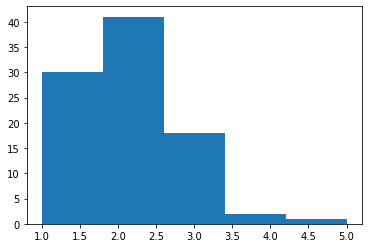

In [19]:
h = plt.hist(data_fill.loc[data_fill['UF']=='RIO DE JANEIRO', 'classe'], bins=5)
print(data_fill.loc[data_fill['UF']=='RIO DE JANEIRO', 'classe'].describe())
print("\nQuantidades de cada classe:")
print(h[0])